## Predictive Maintenance with Deep Learning 

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Reading data with Pandas

In [5]:
df=pd.read_csv("datasets/predictive_maintenance.csv")

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
df.isnull().sum() # Data has no missing values

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [9]:
df.describe().T  # a statistical summary

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [10]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [11]:
# We are separating our data from the independent variable, which is referred to as the “target”.
# Because our data contains categorical variables, we are creating dummy variables to represent them.
# Additionally, we are removing variables that do not contribute to our analysis, such as “Product ID” and “UDI”.

X = pd.get_dummies(df.iloc[:,2:-2], drop_first=True)
X.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,1
1,298.2,308.7,1408,46.3,3,1,0
2,298.1,308.5,1498,49.4,5,1,0
3,298.2,308.6,1433,39.5,7,1,0
4,298.2,308.7,1408,40.0,9,1,0


In [12]:
y = df['Target'] 

In [13]:
y.value_counts() # Data shows imbalance between 0 and 1.

0    9661
1     339
Name: Target, dtype: int64

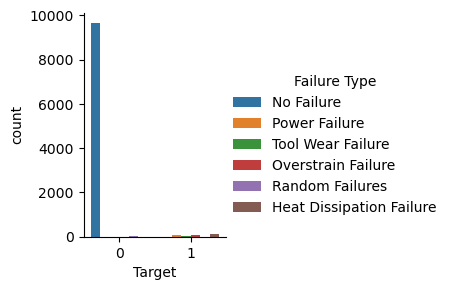

In [16]:
# Visualization of failures according to Failure Type 
sns.catplot(data=df, x='Target', kind='count', hue='Failure Type', height=3, orient="h")
plt.show()

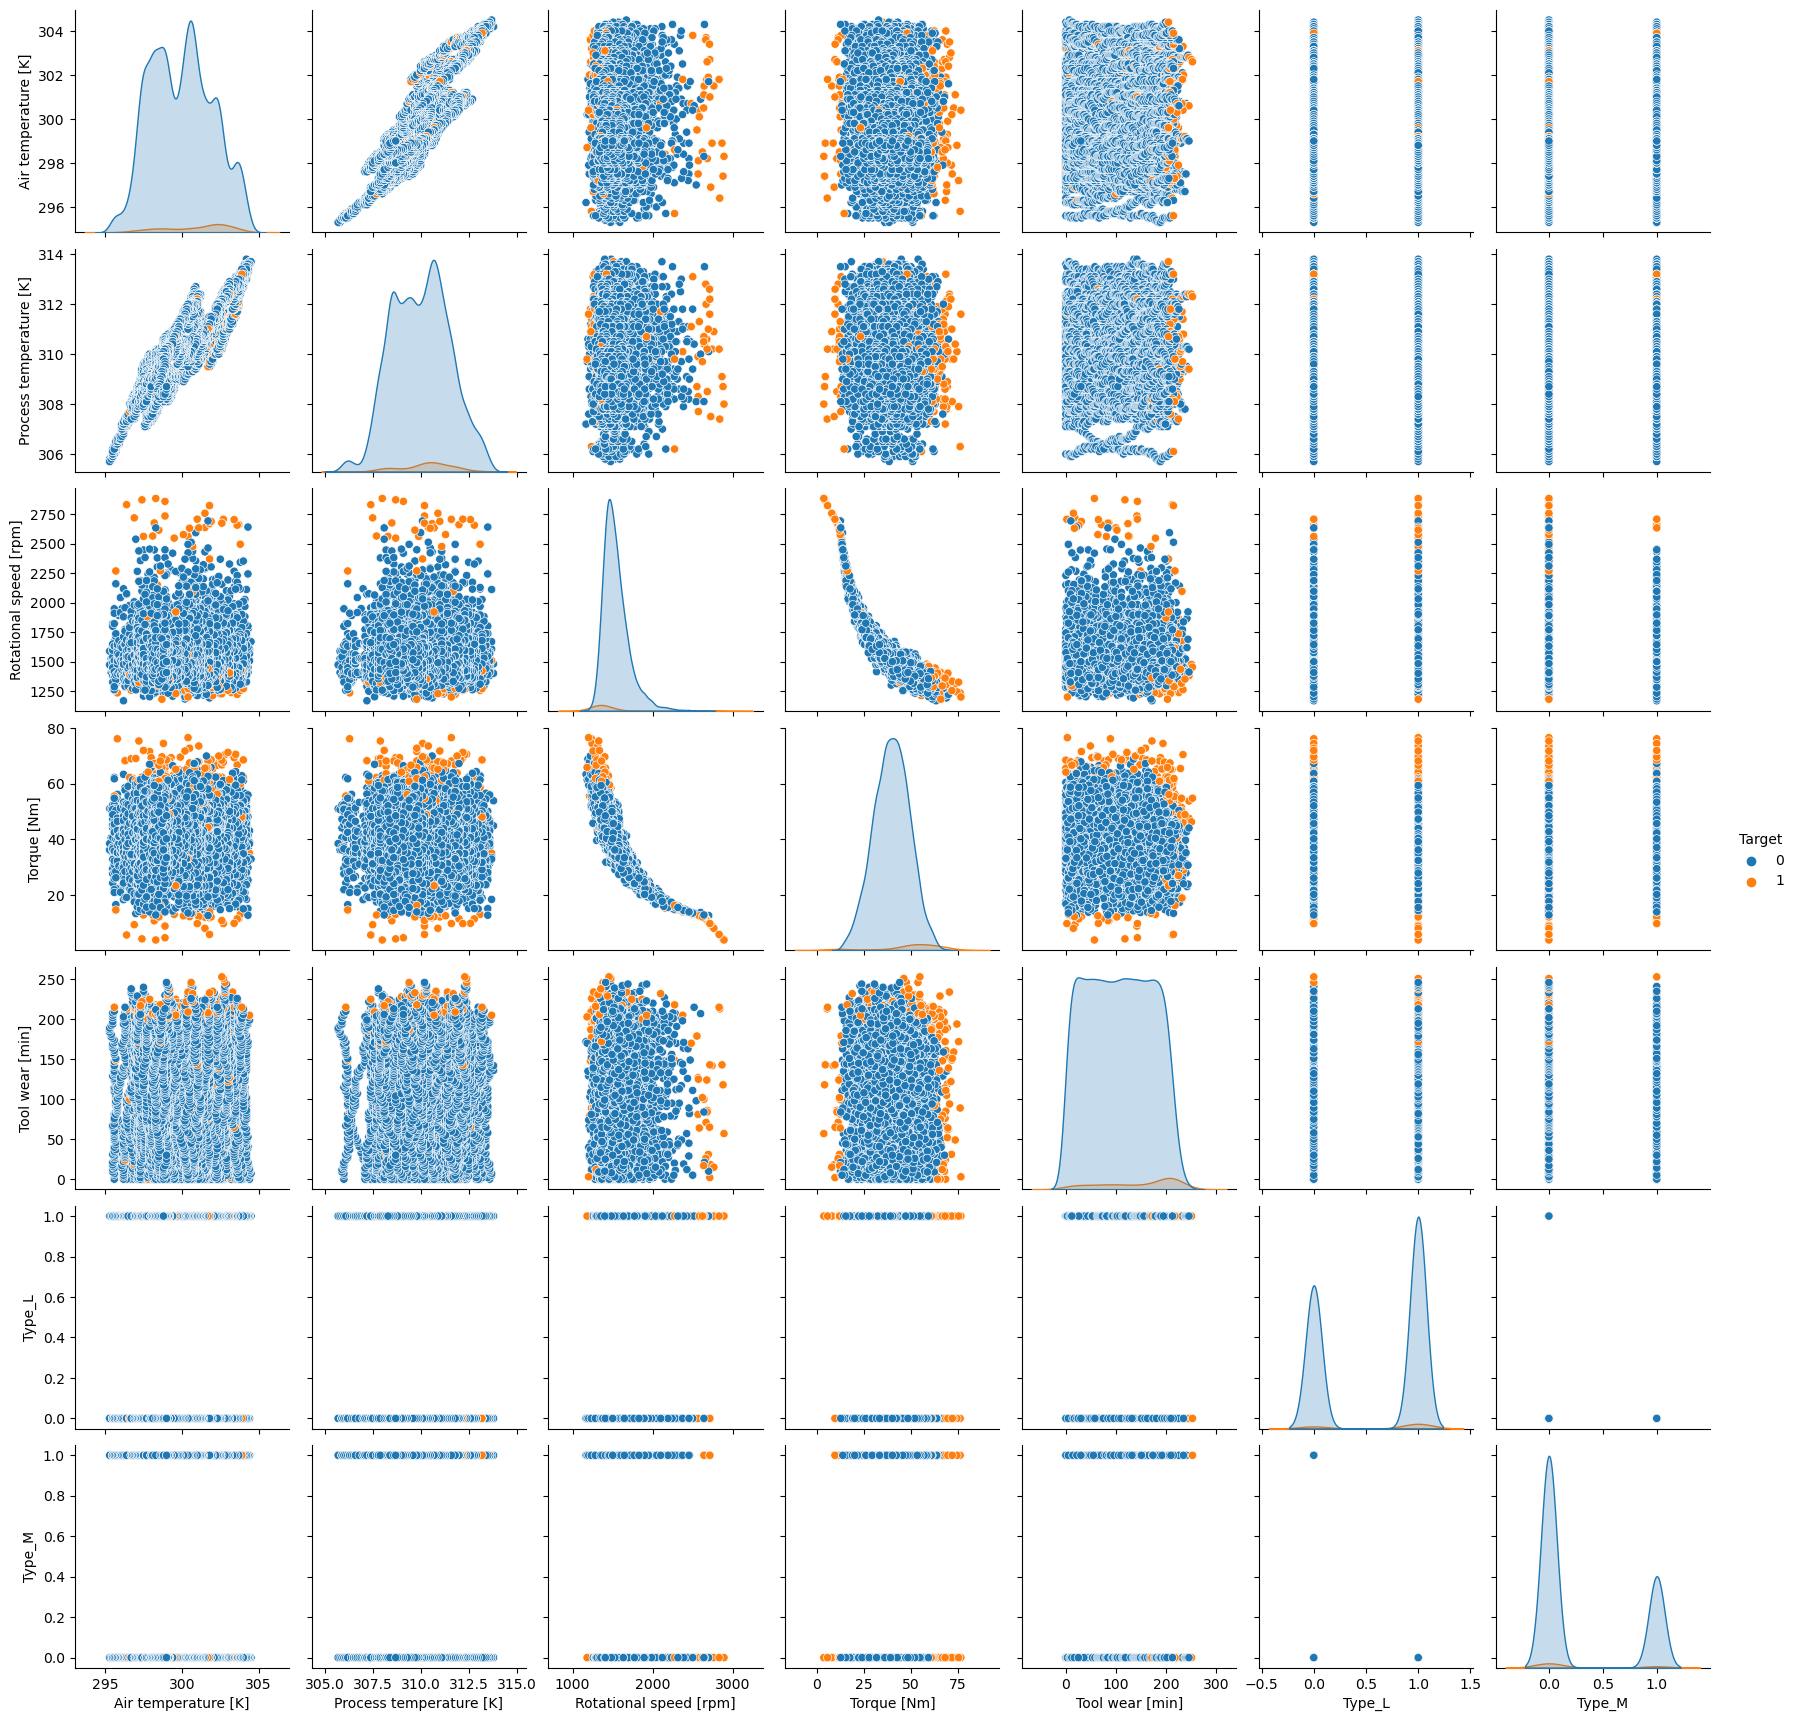

In [17]:
#Visualization of failure and non failure

import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(pd.concat([X,y], axis=1), hue='Target')
plt.show()

In [19]:
#Creating scaling object
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
#Splitting the data to train and test data
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size =0.4, random_state=1)

In [21]:
rescaledX_train = scaler.fit_transform(train_X) #Scaling the train data
rescaledX_test = scaler.transform(test_X) #Scaling the test data

In [22]:
#Creating the deep learning model object
clf = MLPClassifier(hidden_layer_sizes=(2), activation = 'logistic', solver = 'lbfgs', random_state=1)

In [23]:
clf.fit(rescaledX_train, train_y) #fits the model

MLPClassifier(activation='logistic', hidden_layer_sizes=2, random_state=1,
              solver='lbfgs')

In [24]:
# training performance
classificationSummary(train_y, clf.predict(rescaledX_train))

# validation performance
classificationSummary(test_y, clf.predict(rescaledX_test))

Confusion Matrix (Accuracy 0.9765)

       Prediction
Actual    0    1
     0 5772   30
     1  111   87
Confusion Matrix (Accuracy 0.9765)

       Prediction
Actual    0    1
     0 3841   18
     1   76   65


In [25]:
# The accuracy is very high for both training and validation performance, however our ability to identify
# the true positives is very low as seen below.

In [28]:
print(classification_report(train_y, clf.predict(rescaledX_train))) # training performance


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5802
           1       0.74      0.44      0.55       198

    accuracy                           0.98      6000
   macro avg       0.86      0.72      0.77      6000
weighted avg       0.97      0.98      0.97      6000



In [29]:
print(classification_report(test_y, clf.predict(rescaledX_test))) # validation performance


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3859
           1       0.78      0.46      0.58       141

    accuracy                           0.98      4000
   macro avg       0.88      0.73      0.78      4000
weighted avg       0.97      0.98      0.97      4000



In [30]:
# We try another model with wider hidden layer sizes and a different solver
# to see if there is any improvement in that regard

In [32]:
clf = MLPClassifier(hidden_layer_sizes=(100,30), activation = 'logistic', solver = 'adam', random_state=1)


In [33]:
clf.fit(rescaledX_train, train_y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 30),
              random_state=1)

In [35]:
print(classification_report(train_y, clf.predict(rescaledX_train))) # training performance

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5802
           1       0.72      0.13      0.22       198

    accuracy                           0.97      6000
   macro avg       0.85      0.56      0.60      6000
weighted avg       0.96      0.97      0.96      6000



In [36]:
print(classification_report(test_y, clf.predict(rescaledX_test))) # validation performance

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3859
           1       0.79      0.16      0.27       141

    accuracy                           0.97      4000
   macro avg       0.88      0.58      0.63      4000
weighted avg       0.96      0.97      0.96      4000



In [37]:
# Results became even worse. The problem is the data being so imbalanced and it does not have enough target value = "1".

In [38]:
# To overcome this problem, one approach is to upsampling the minority data. We will use SMOTE to sample it.
# SMOTE stands for Synthetic Minority Over-sampling Technique.

In [39]:
from imblearn.over_sampling import SMOTE

# create an instance of the SMOTE class
sm = SMOTE(random_state=123)

# use the fit_resample method to oversample the minority class
X_resampled, y_resampled = sm.fit_resample(X, y)

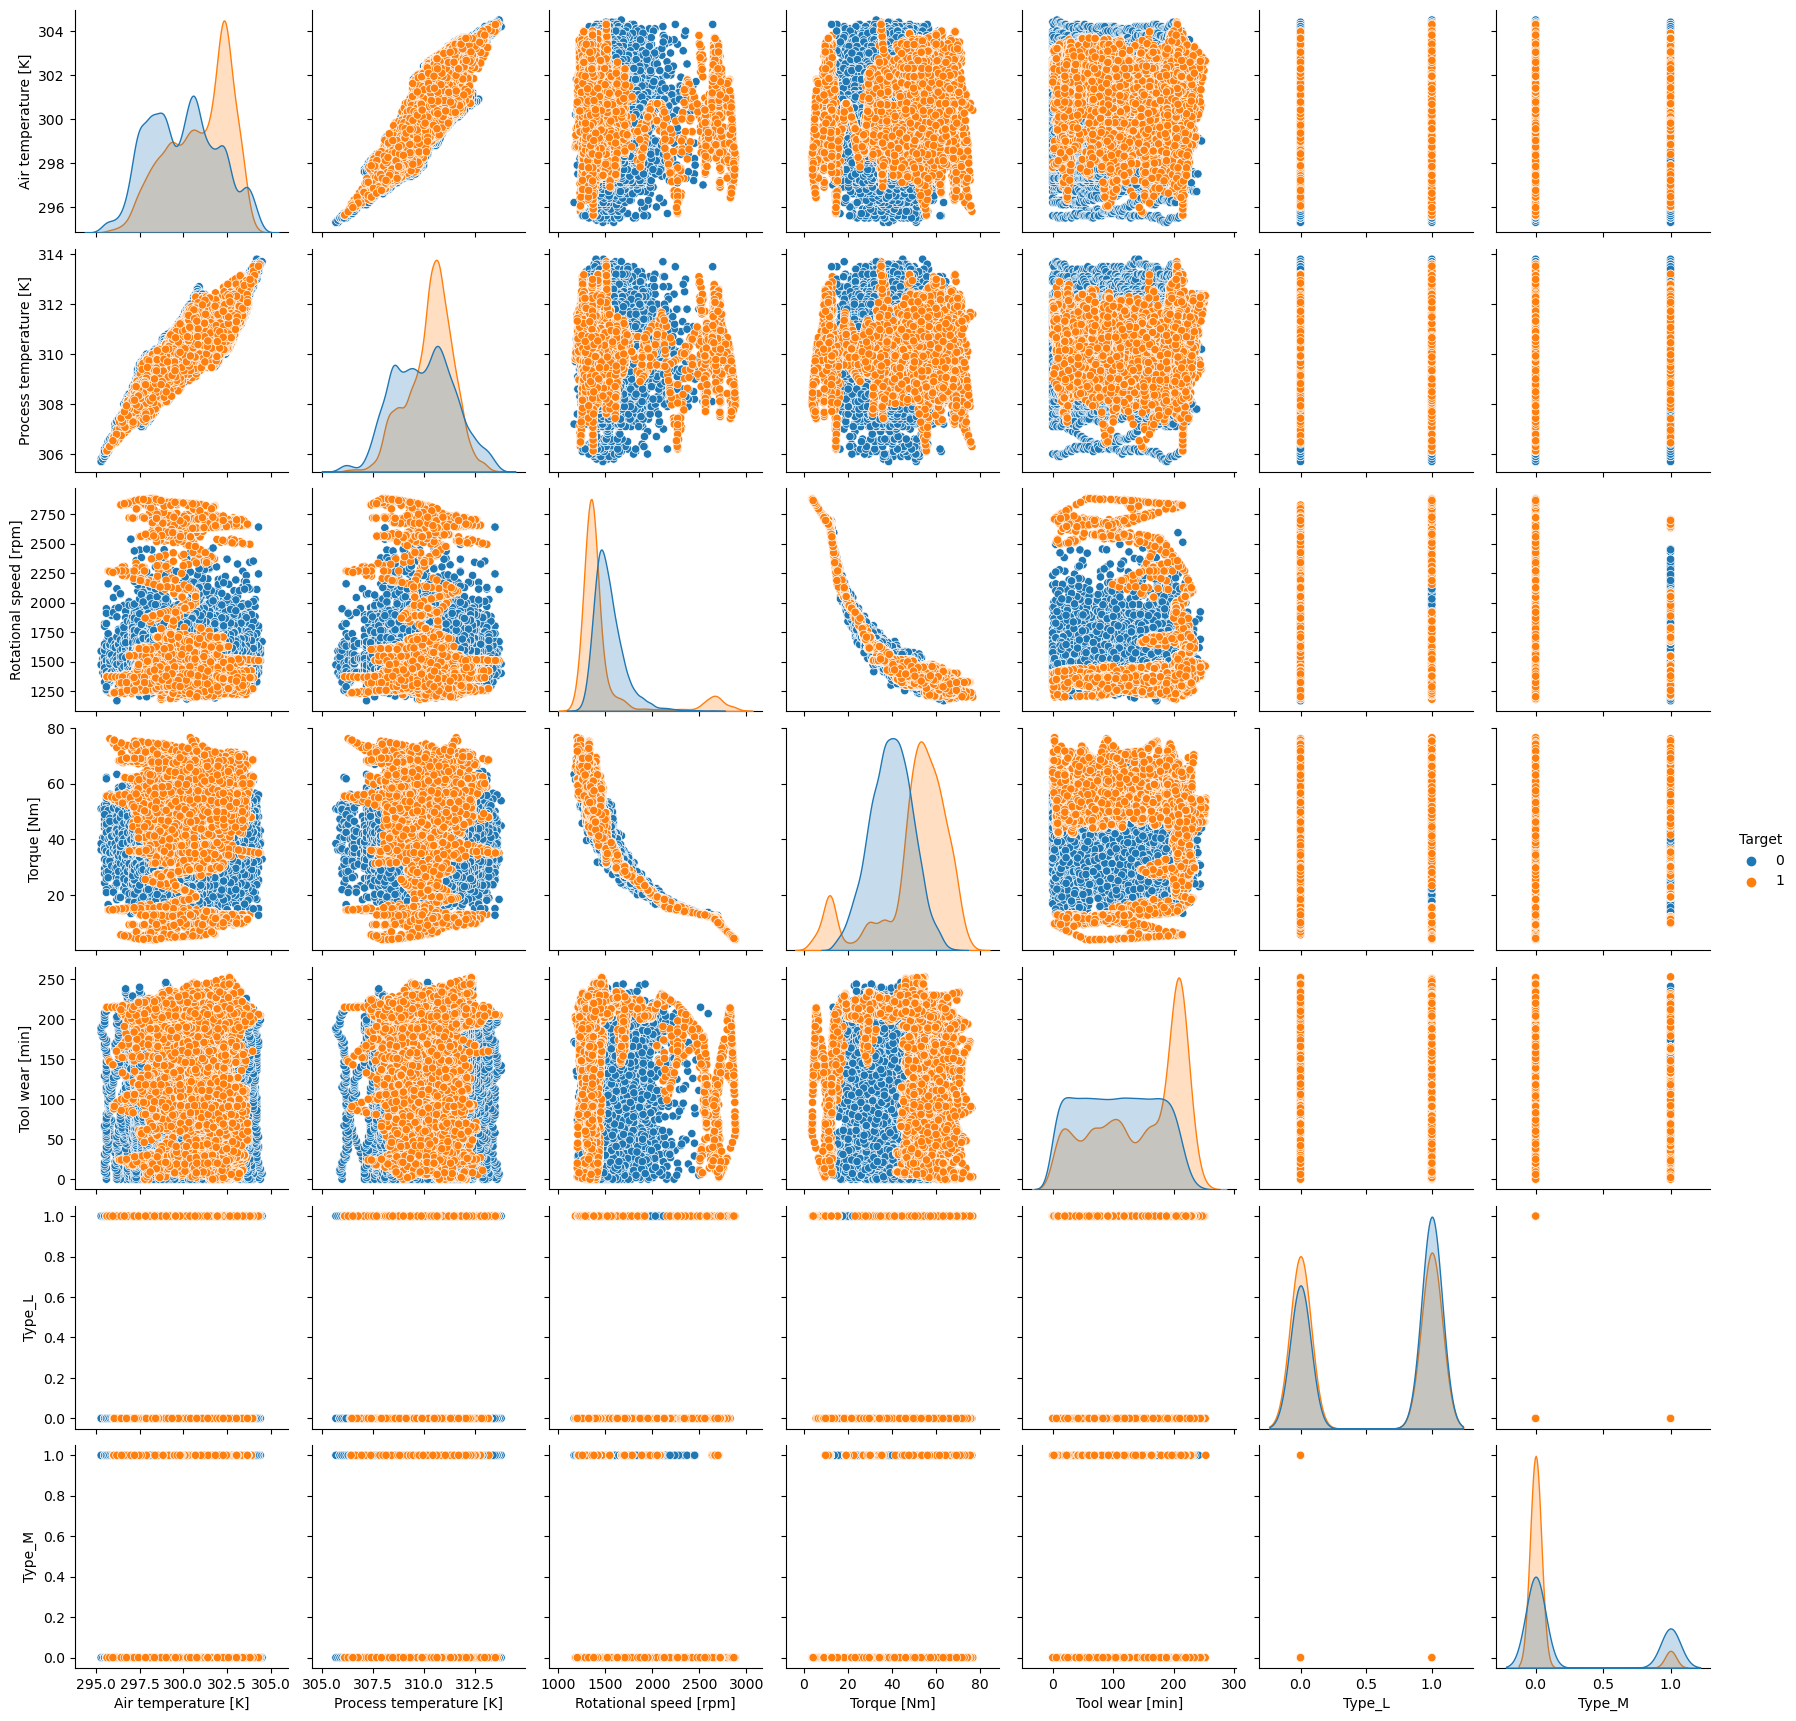

In [40]:
# Visualization of the effect of SMOTE
df2=pd.concat([X_resampled,y_resampled], axis=1)
sns.pairplot(df2, hue='Target')
plt.show()


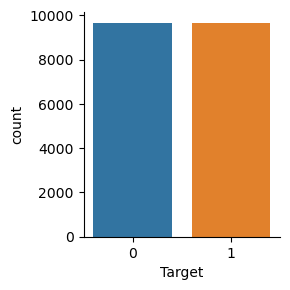

In [41]:
sns.catplot(data=df2, x='Target', kind='count', height=3, orient="h")
plt.show()

In [42]:
# Splitting the new data to train and test data

train_X, test_X, train_y, test_y = train_test_split(X_resampled, y_resampled, test_size =0.4, random_state=1)

In [43]:
# Scaling the new data 

rescaledX_train = scaler.fit_transform(train_X)
rescaledX_test = scaler.transform(test_X)

In [44]:
# We use the same hyperparameters to create the first model again.

clf = MLPClassifier(hidden_layer_sizes=(2), activation = 'logistic', solver = 'lbfgs', random_state=1)
clf.fit(rescaledX_train, train_y)

MLPClassifier(activation='logistic', hidden_layer_sizes=2, random_state=1,
              solver='lbfgs')

In [45]:
# training performance
classificationSummary(train_y, clf.predict(rescaledX_train))

# validation performance
classificationSummary(test_y, clf.predict(rescaledX_test))

Confusion Matrix (Accuracy 0.8650)

       Prediction
Actual    0    1
     0 4998  778
     1  787 5030
Confusion Matrix (Accuracy 0.8656)

       Prediction
Actual    0    1
     0 3350  535
     1  504 3340


In [46]:
# As seen in the summary above, the accuray got decreased but we gained a lot in recall and f1-score
# which considers both the true positive rate and the false positive rate of the model.


In [48]:
print(classification_report(train_y, clf.predict(rescaledX_train))) # training performance


              precision    recall  f1-score   support

           0       0.86      0.87      0.86      5776
           1       0.87      0.86      0.87      5817

    accuracy                           0.87     11593
   macro avg       0.87      0.87      0.87     11593
weighted avg       0.87      0.87      0.87     11593



In [49]:
print(classification_report(test_y, clf.predict(rescaledX_test))) # validation performance


              precision    recall  f1-score   support

           0       0.87      0.86      0.87      3885
           1       0.86      0.87      0.87      3844

    accuracy                           0.87      7729
   macro avg       0.87      0.87      0.87      7729
weighted avg       0.87      0.87      0.87      7729



In [50]:
# To validate our data, we will use 5 fold cross validation method to be more confident
# about our model's performance on unseen data.

In [51]:
from sklearn.model_selection import cross_validate
scores = cross_validate(clf, X_resampled, y_resampled, cv=5)
scores

{'fit_time': array([0.01451111, 0.01687098, 0.0153749 , 0.01826215, 0.01450992]),
 'score_time': array([0.00212455, 0.00250459, 0.00200868, 0.00199986, 0.00099993]),
 'test_score': array([0.49987063, 0.49987063, 0.5       , 0.5       , 0.5       ])}

In [52]:
np.mean(scores.get('test_score')) # mean test_scores

0.49994825355756795

In [53]:
# As seen above our test_scores are very poor which indicates the model itself is not reliable.

In [54]:
# We will use GridSearchCV method to select best parameters for our model and cross validate them at the same time

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.pipeline import Pipeline #pipeline is a sequence of data processing steps

clf = MLPClassifier()

pipeline = Pipeline([('scaler', StandardScaler()), ('clf', MLPClassifier(random_state=1))]) #we will scale the data first and then create a new model
parameters = {'clf__hidden_layer_sizes': [(50), (100), (200)], # will try different hidden layer size
              'clf__activation': ['relu', 'logistic'], # will try different activation functions 
              'clf__solver': ['adam', 'lbfgs']} # will try different solvers

# definening the scoring metric, we will use f1 score instead of accuracy
f1_scorer = make_scorer(f1_score, pos_label=1)

# create the grid search object
grid_search = GridSearchCV(pipeline, parameters, scoring=f1_scorer, cv=5, verbose=0)

# fit the grid search to the data
grid_search.fit(X_resampled, y_resampled)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', MLPClassifier(random_state=1))]),
             param_grid={'clf__activation': ['relu', 'logistic'],
                         'clf__hidden_layer_sizes': [50, 100, 200],
                         'clf__solver': ['adam', 'lbfgs']},
             scoring=make_scorer(f1_score, pos_label=1))

In [55]:
# print the best parameters and the best F1-score
print("Best parameters: ", grid_search.best_params_)
print("Best F1-score: ", grid_search.best_score_)

Best parameters:  {'clf__activation': 'logistic', 'clf__hidden_layer_sizes': 100, 'clf__solver': 'lbfgs'}
Best F1-score:  0.941934508630851


In [61]:
# we will use the best parameters according to results of grid search method
best_model=grid_search.best_estimator_ 

In [62]:
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 MLPClassifier(activation='logistic', hidden_layer_sizes=100,
                               random_state=1, solver='lbfgs'))])

In [63]:
best_model.fit(train_X, train_y) #Training our model with train data

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 MLPClassifier(activation='logistic', hidden_layer_sizes=100,
                               random_state=1, solver='lbfgs'))])

In [68]:
# Classification report shows our ability to identify both 0's and 1's with a great f1 and accuracy score.
print(classification_report(test_y, best_model.predict(test_X)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3885
           1       0.96      0.98      0.97      3844

    accuracy                           0.97      7729
   macro avg       0.97      0.97      0.97      7729
weighted avg       0.97      0.97      0.97      7729



In [69]:
# training performance
classificationSummary(train_y, best_model.predict(train_X))

# validation performance
classificationSummary(test_y, best_model.predict(test_X))

Confusion Matrix (Accuracy 0.9726)

       Prediction
Actual    0    1
     0 5553  223
     1   95 5722
Confusion Matrix (Accuracy 0.9653)

       Prediction
Actual    0    1
     0 3712  173
     1   95 3749


In [65]:
scores = cross_validate(best_model, X_resampled, y_resampled, cv=5, verbose=0) #We use the best model to check test scores as well


In [66]:
#We are confident that our model can be generalized to unseen data.

In [71]:
np.mean(scores.get('test_score')) # mean test_scores

0.9387211772047814